In [837]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes
import math
import geopy
from geopy import distance
import scipy
from scipy import spatial

In [72]:
def arc_to_deg(arc):
    """convert spherical arc length [m] to great circle distance [deg]"""
    return float(arc)/6371/1000 * 180/math.pi

def deg_to_arc(deg):
    """convert great circle distance [deg] to spherical arc length [m]"""
    return float(deg)*6371*1000 * math.pi/180

def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]


In [134]:
pd.set_option('display.max_columns', 1000)

In [847]:
df=pd.read_hdf('/Users/jomammahoule1993/Downloads/Small_6.8.22windgps_data.hdf')

In [848]:
import time
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df.time.iloc[-1]))

#time.localtime(df.time.iloc[0]).tm_min

'2022-06-08 17:30:45'

In [ ]:
'''
**to keep: 

** millis_1
** lat_1 ------> convert to x y z
** lon_1 ------>
**gps_time_1
**gps_date_1
**wind_1
**gps_date_str_1
**year_1 
**month_1
**day_1
**gps_time_str_1
**hour_1
**minute_1
**second_1 
** time ------> rename epoch time
** S2_1    
** D_1   
** T_1   
** U_1   
** V_1   
** W_1  


Remove:
MD_1   
AX_1   
AY_1     
AZ_1  
TD_1
Temp_1

add: 

_verticallyorientated to vertical sensors

'''

In [687]:
df=df.reset_index(inplace=False)

In [688]:
df=df.drop(columns='index')

In [689]:
df

,millis_2,lat_2,lon_2,gps_time_2,gps_date_2,wind_2,gps_date_str_2,year_2,month_2,day_2,gps_time_str_2,hour_2,minute_2,second_2,time,S2_2,D_2,T_2,U_2,V_2,W_2,MD_2,AX_2,AY_2,AZ_2,Temp_2,millis_3,lat_3,lon_3,gps_time_3,gps_date_3,wind_3,gps_date_str_3,year_3,month_3,day_3,gps_time_str_3,hour_3,minute_3,second_3,S2_3,D_3,T_3,U_3,V_3,W_3,MD_3,AX_3,AY_3,AZ_3,Temp_3,millis_4,lat_4,lon_4,gps_time_4,gps_date_4,wind_4,gps_date_str_4,year_4,month_4,day_4,gps_time_str_4,hour_4,minute_4,second_4,S2_4,D_4,T_4,U_4,V_4,W_4,MD_4,AX_4,AY_4,AZ_4,Temp_4,millis_5,lat_5,lon_5,gps_time_5,gps_date_5,wind_5,gps_date_str_5,year_5,month_5,day_5,gps_time_str_5,hour_5,minute_5,second_5,S2_5,D_5,T_5,U_5,V_5,W_5,MD_5,AX_5,AY_5,AZ_5,Temp_5,millis_6,lat_6,lon_6,gps_time_6,gps_date_6,wind_6,gps_date_str_6,year_6,month_6,day_6,gps_time_str_6,hour_6,minute_6,second_6,S2_6,D_6,T_6,U_6,V_6,W_6,MD_6,AX_6,AY_6,AZ_6,Temp_6,millis_7,lat_7,lon_7,gps_time_7,gps_date_7,wind_7,gps_date_str_7,year_7,month_7,day_7,gps_time_str_7,hour_7,minute_7,second_7,S2_7,D_7,T_7,U_7,V_7,W_7,MD_7,AX_7,AY_7,AZ_7,Temp_7,millis_8,lat_8,lon_8,gps_time_8,gps_date_8,wind_8,gps_date_str_8,year_8,month_8,day_8,gps_time_str_8,hour_8,minute_8,second_8,S2_8,D_8,T_8,U_8,V_8,W_8,MD_8,AX_8,AY_8,AZ_8,Temp_8,millis_9,lat_9,lon_9,gps_time_9,gps_date_9,wind_9,gps_date_str_9,year_9,month_9,day_9,gps_time_str_9,hour_9,minute_9,second_9,S2_9,D_9,T_9,U_9,V_9,W_9,MD_9,AX_9,AY_9,AZ_9,Temp_9
0,1176931,39.405392,-120.123947,183323,220622,b'\nS2 01.293 D 074 U -01.244 V -00.355 W 0...,220622,2022.0,6.0,22.0,183323,18,33,23,1.655923e+09,1.293,74.0,19.97,-1.244,-0.355,0.129,141.0,256.0,-510.0,15872.0,19.97,702447,39.405212,-120.124329,183325,220622,b'\nS2 01.73 D 118 U -01.53 V 00.80 W -00.0...,220622,2022.0,6.0,22.0,183325,18,33,25,1.73,118.0,20.33,-1.53,0.80,-0.04,323.0,-325.0,320.0,16448.0,20.33,2463657,39.405354,-120.123459,183323,220622,b'\nS2 00.374 D 273 U 00.373 V -00.018 W -0...,220622,2022.0,6.0,22.0,183323,18,33,23,0.374,273.0,23.02,0.373,-0.018,-0.174,284.0,16128.0,256.0,256.0,23.02,355918,39.405197,-120.124695,183224,220622,b'\nS2 01.674 D 124 U -01.392 V 00.930 W 0...,220622,2022.0,6.0,22.0,183224,18,32,24,1.674,124.0,21.13,-1.392,0.930,0.037,336.0,112.0,-576.0,17124.0,21.13,33369,1000.000000,1000.00000,183325,220622,b'\nS2 01.92 D 108 U -01.82 V 00.60 W -00.1...,220622,2022.0,6.0,22.0,183325,18,33,25,1.92,108.0,19.45,-1.82,0.60,-0.15,141.0,-256.0,256.0,14336.0,19.45,2175054,39.405270,-120.123283,183323,220622,b'\nS2 01.30 D 102 U -01.27 V 00.27 W 00.3...,220622,2022.0,6.0,22.0,183323,18,33,23,1.30,102.0,20.08,-1.27,0.27,0.31,9.0,664.0,-337.0,15656.0,20.08,1640224,39.405083,-120.123062,183323,220622,b'\nS2 01.20 D 131 U -00.90 V 00.79 W 00.0...,220622,2022.0,6.0,22.0,183323,18,33,23,1.20,131.0,18.86,-0.90,0.79,0.02,1.0,-160.0,260.0,16260.0,18.86,1580348,39.405048,-120.123047,182754,220622,b'\nS2 00.48 D 295 U 00.44 V -00.21 W 00.4...,220622,2022.0,6.0,22.0,182754,18,27,54,0.48,295.0,21.43,0.44,-0.21,0.41,24.0,16128.0,249.0,768.0,21.43
1,1177031,39.405392,-120.123947,183323,220622,b'\nS2 01.439 D 065 U -01.299 V -00.618 W 0...,220622,2022.0,6.0,22.0,183323,18,33,23,1.655923e+09,1.439,65.0,19.88,-1.299,-0.618,0.310,140.0,256.0,-510.0,16128.0,19.88,702547,39.405212,-120.124329,183325,220622,b'\nS2 01.65 D 123 U -01.39 V 00.89 W -00.1...,220622,2022.0,6.0,22.0,183325,18,33,25,1.65,123.0,20.32,-1.39,0.89,-0.13,323.0,-341.0,352.0,16448.0,20.32,2463757,39.405354,-120.123459,183323,220622,b'\nS2 00.520 D 287 U 00.498 V -00.152 W -0...,220622,2022.0,6.0,22.0,183323,18,33,23,0.520,287.0,23.04,0.498,-0.152,-0.264,290.0,16384.0,256.0,512.0,23.04,356018,39.405197,-120.124695,183224,220622,b'\nS2 01.502 D 121 U -01.281 V 00.784 W 0...,220622,2022.0,6.0,22.0,183224,18,32,24,1.502,121.0,21.46,-1.281,0.784,0.155,336.0,140.0,-540.0,17096.0,21.46,33469,1000.000000,1000.00000,183325,220622,b'\nS2 01.71 D 108 U -01.63 V 00.53 W -00.0...,220622,2022.0,6.0,22.0,183325,18,33,25,1.71,108.0,19.45,-1.63,0.53,-0.08,140.0,0.0,-256

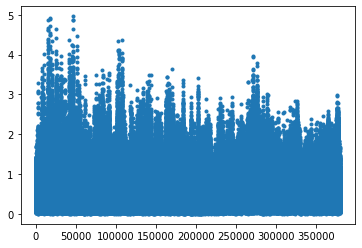

In [478]:
plt.plot(df.S2_4,'.')

In [343]:
df=df.drop(columns={'millis_4','lat_4', 'lon_4','gps_time_4','gps_date_4', 'wind_4',
                 'gps_date_str_4','year_4','month_4','day_4','gps_time_str_4',
                 'hour_4', 'minute_4', 'second_4', 'S2_4', 'D_4', 'T_4', 'U_4', 'V_4', 'W_4',  
                 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Temp_5', 'Temp_6', 'Temp_7', 'Temp_8', 'Temp_9',
})

In [691]:
df=df.drop(columns={#'MD_1', 'AX_1', 'AY_1', 'AZ_1', 'TD_1', #'Temp_1',
                    'MD_2','AX_2', 'AY_2', 'AZ_2',  #'Temp_2',
                    'MD_3','AX_3', 'AY_3', 'AZ_3', #'Temp_3',
                    'MD_4','AX_4', 'AY_4', 'AZ_4',# 'Temp_4',
                   'MD_5','AX_5', 'AY_5', 'AZ_5', # 'Temp_5',
                    'MD_6','AX_6', 'AY_6', 'AZ_6',# 'Temp_6',
                    'MD_7','AX_7', 'AY_7', 'AZ_7',# 'Temp_7',
                    'MD_8','AX_8', 'AY_8', 'AZ_8',# 'Temp_8',
                    'MD_9','AX_9', 'AY_9', 'AZ_9',# 'Temp_9',
                     'Temp_2', 'Temp_3', 'Temp_4', 'Temp_5', 'Temp_6', 'Temp_7', 'Temp_8', 'Temp_9',
})

In [692]:
#20 columns per sensor
df=df.rename(columns={'millis_4': 'millis_4_verticallyorientated','lat_4':   'lat_4_verticallyorientated',
                   'lon_4':  'lon_4_verticallyorientated','gps_time_4':  'gps_time_4_verticallyorientated',
                   'gps_date_4': 'gps_date_4_verticallyorientated','wind_4': 'wind_4_verticallyorientated', 
                   'gps_date_str_4':  'gps_date_str_4_verticallyorientated','year_4': 'year_4_verticallyorientated', 
                   'month_4':  'month_4_verticallyorientated', 'day_4': 'day_4_verticallyorientated', 
                   'gps_time_str_4': 'gps_time_str_4_verticallyorientated', 'hour_4': 'hour_4_verticallyorientated', 
                   'minute_4':  'minute_4_verticallyorientated', 'second_4':  'second_4_verticallyorientated', 
                   'S2_4':   'S2_4_verticallyorientated', 'D_4': 'D_4_verticallyorientated', 
                   'T_4': 'T_4_verticallyorientated'  ,'U_4': 'U_4_verticallyorientated'  , 'V_4': 'V_4_verticallyorientated',   
                   'W_4':   'W_4_verticallyorientated', 
                      
                  'millis_9': 'millis_9_verticallyorientated','lat_9':   'lat_9_verticallyorientated','lon_9':  
                   'lon_9_verticallyorientated','gps_time_9':  'gps_time_9_verticallyorientated','gps_date_9': 
                   'gps_date_9_verticallyorientated','wind_9': 'wind_9_verticallyorientated', 
                   'gps_date_str_9':  'gps_date_str_9_verticallyorientated','year_9': 'year_9_verticallyorientated', 
                   'month_9':  'month_9_verticallyorientated', 'day_9': 'day_9_verticallyorientated', 
                   'gps_time_str_9': 'gps_time_str_9_verticallyorientated', 'hour_9': 'hour_9_verticallyorientated', 
                   'minute_9':  'minute_9_verticallyorientated', 'second_9':  'second_9_verticallyorientated', 
                   'S2_9':   'S2_9_verticallyorientated', 'D_9': 'D_9_verticallyorientated', 
                   'T_9': 'T_9_verticallyorientated'  ,'U_9': 'U_9_verticallyorientated'  , 
                   'V_9': 'V_9_verticallyorientated',   'W_9':   'W_9_verticallyorientated'})

In [139]:
#20 columns per sensor
df=df.rename(columns={'millis_4': 'millis_4_verticallyorientated','lat_4':   'lat_4_verticallyorientated',
                   'lon_4':  'lon_4_verticallyorientated','gps_time_4':  'gps_time_4_verticallyorientated',
                   'gps_date_4': 'gps_date_4_verticallyorientated','wind_4': 'wind_4_verticallyorientated', 
                   'gps_date_str_4':  'gps_date_str_4_verticallyorientated','year_4': 'year_4_verticallyorientated', 
                   'month_4':  'month_4_verticallyorientated', 'day_4': 'day_4_verticallyorientated', 
                   'gps_time_str_4': 'gps_time_str_4_verticallyorientated', 'hour_4': 'hour_4_verticallyorientated', 
                   'minute_4':  'minute_4_verticallyorientated', 'second_4':  'second_4_verticallyorientated', 
                   'S2_4':   'S2_4_verticallyorientated', 'D_4': 'D_4_verticallyorientated', 
                   'T_4': 'T_4_verticallyorientated'  ,'U_4': 'U_4_verticallyorientated'  , 'V_4': 'V_4_verticallyorientated',   
                   'W_4':   'W_4_verticallyorientated', 
                   
                   'millis_7': 'millis_7_verticallyorientated','lat_7':   'lat_7_verticallyorientated','lon_7':  
                   'lon_7_verticallyorientated','gps_time_7':  'gps_time_7_verticallyorientated','gps_date_7': 
                   'gps_date_7_verticallyorientated','wind_7': 'wind_7_verticallyorientated', 
                   'gps_date_str_7':  'gps_date_str_7_verticallyorientated','year_7': 'year_7_verticallyorientated', 
                   'month_7':  'month_7_verticallyorientated', 'day_7': 'day_7_verticallyorientated', 
                   'gps_time_str_7': 'gps_time_str_7_verticallyorientated', 'hour_7': 'hour_7_verticallyorientated', 
                   'minute_7':  'minute_7_verticallyorientated', 'second_7':  'second_7_verticallyorientated', 
                   'S2_7':   'S2_7_verticallyorientated', 'D_7': 'D_7_verticallyorientated', 
                   'T_7': 'T_7_verticallyorientated'  ,'U_7': 'U_7_verticallyorientated'  , 
                   'V_7': 'V_7_verticallyorientated',   'W_7':   'W_7_verticallyorientated'})

In [386]:
#20 columns per sensor
df=df.rename(columns={'millis_8': 'millis_8_verticallyorientated','lat_8':   'lat_8_verticallyorientated',
                   'lon_8':  'lon_8_verticallyorientated','gps_time_8':  'gps_time_8_verticallyorientated',
                   'gps_date_8': 'gps_date_8_verticallyorientated','wind_8': 'wind_8_verticallyorientated', 
                   'gps_date_str_8':  'gps_date_str_8_verticallyorientated','year_8': 'year_8_verticallyorientated', 
                   'month_8':  'month_8_verticallyorientated', 'day_8': 'day_8_verticallyorientated', 
                   'gps_time_str_8': 'gps_time_str_8_verticallyorientated', 'hour_8': 'hour_8_verticallyorientated', 
                   'minute_8':  'minute_8_verticallyorientated', 'second_8':  'second_8_verticallyorientated', 
                   'S2_8':   'S2_8_verticallyorientated', 'D_8': 'D_8_verticallyorientated', 
                   'T_8': 'T_8_verticallyorientated'  ,'U_8': 'U_8_verticallyorientated'  , 'V_8': 'V_8_verticallyorientated',   
                   'W_8':   'W_8_verticallyorientated', 
                   
                   'millis_9': 'millis_9_verticallyorientated','lat_9':   'lat_9_verticallyorientated','lon_9':  
                   'lon_9_verticallyorientated','gps_time_9':  'gps_time_9_verticallyorientated','gps_date_9': 
                   'gps_date_9_verticallyorientated','wind_9': 'wind_9_verticallyorientated', 
                   'gps_date_str_9':  'gps_date_str_9_verticallyorientated','year_9': 'year_9_verticallyorientated', 
                   'month_9':  'month_9_verticallyorientated', 'day_9': 'day_9_verticallyorientated', 
                   'gps_time_str_9': 'gps_time_str_9_verticallyorientated', 'hour_9': 'hour_9_verticallyorientated', 
                   'minute_9':  'minute_9_verticallyorientated', 'second_9':  'second_9_verticallyorientated', 
                   'S2_9':   'S2_9_verticallyorientated', 'D_9': 'D_9_verticallyorientated', 
                   'T_9': 'T_9_verticallyorientated'  ,'U_9': 'U_9_verticallyorientated'  , 
                   'V_9': 'V_9_verticallyorientated',   'W_9':   'W_9_verticallyorientated'})

In [543]:
print(df.head())

   millis_1      lat_1       lon_1  gps_time_1  gps_date_1  \
0   2969209  39.678631 -119.794319      183443       10622   
1   2969309  39.678631 -119.794319      183443       10622   
2   2969409  39.678631 -119.794327      183444       10622   
3   2969509  39.678631 -119.794327      183444       10622   
4   2969609  39.678631 -119.794327      183444       10622   

                                              wind_1 gps_date_str_1  year_1  \
0  b'\nS2  02.19 D  145 U -01.24 V  01.80 W  00.1...         010622  2022.0   
1  b'\nS2  02.20 D  145 U -01.27 V  01.80 W  00.0...         010622  2022.0   
2  b'\nS2  02.43 D  140 U -01.56 V  01.86 W  00.1...         010622  2022.0   
3  b'\nS2  02.38 D  133 U -01.73 V  01.63 W  00.2...         010622  2022.0   
4  b'\nS2  02.33 D  147 U -01.28 V  01.95 W  00.0...         010622  2022.0   

   month_1  day_1 gps_time_str_1  hour_1  minute_1  second_1          time  \
0      6.0    1.0         183443      18        34        43  1.654108e+09

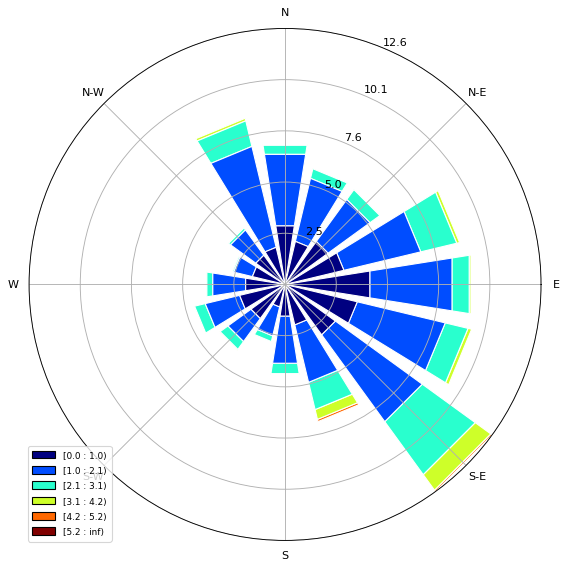

In [725]:
ax = WindroseAxes.from_ax()
ax.bar(df.D_7, df.S2_7, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

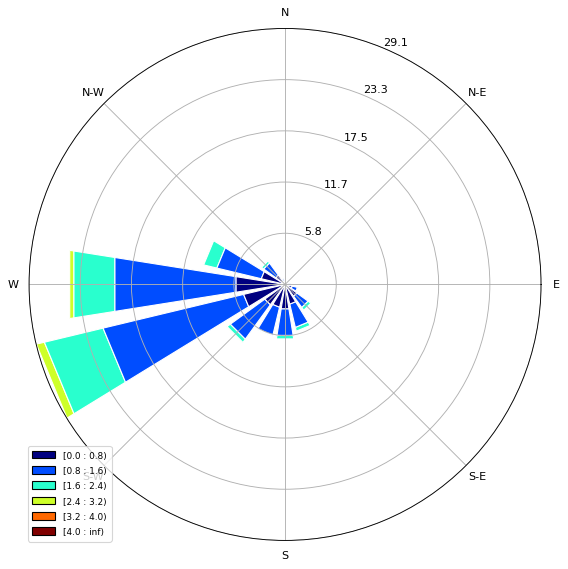

In [723]:
ax = WindroseAxes.from_ax()
ax.bar(df.D_9_verticallyorientated, df.S2_9_verticallyorientated, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [146]:
(df.lat_4_verticallyorientated.mode(), df.lon_4_verticallyorientated.mode())

(0    39.252094
 dtype: float32,
 0   -119.878014
 dtype: float32)

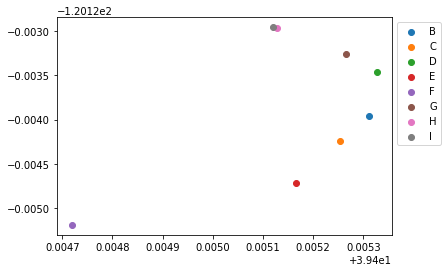

In [693]:
#plt.scatter(df.lat_1.mode(), df.lon_1.mode(), label='A')
plt.scatter(df.lat_2.mode(), df.lon_2.mode(), label='B')
plt.scatter(df.lat_3.mode(), df.lon_3.mode(), label='C')
plt.scatter(df.lat_4_verticallyorientated.mode(), df.lon_4_verticallyorientated.mode(), label='D')
plt.scatter(df.lat_5.mode(), df.lon_5.mode(), label='E')
plt.scatter(df.lat_6.mode(), df.lon_6.mode(), label='F')
plt.scatter(df.lat_7.mode(), df.lon_7.mode(), label='G')
plt.scatter(df.lat_8.mode(), df.lon_8.mode(), label='H')
plt.scatter(df.lat_9_verticallyorientated.mode(), df.lon_9_verticallyorientated.mode(), label='I')
plt.legend(bbox_to_anchor=(1,1))

In [713]:
df.lat_8.mode(), df.lon_8.mode()

(0    39.405128
 dtype: float32,
 0   -120.122963
 dtype: float32)

In [716]:
df.lat_9_verticallyorientated.mode(), df.lon_9_verticallyorientated.mode()

(0    39.405121
 dtype: float32,
 0   -120.122955
 dtype: float32)

In [755]:
#desert 10/20/20
D_A=(40.793633,-119.15789)
D_B=(40.793552, -119.15731)
D_D=(40.793968, -119.157166)
D_E=(40.793762, -119.1576)
D_F= (40.794167, -119.157341)
D_G= (40.793968, -119.157791)
D_H= (40.793865, -119.158051)
D_I= (40.793713, -119.156952)



In [715]:
df['X_8']=x
df['Y_8']=y
df['Z_8']=z

In [718]:
df['X_9_verticallyorientated']=x
df['Y_9_verticallyorientated']=y
df['Z_9_verticallyorientated']=z

In [827]:
np.sqrt(((df.X_2)-(df.X_7))**2 + ((df.Y_2)-(df.Y_7))**2 + ((df.Z_2)-(df.Z_7))**2)*1000

0         61.475851
1         61.475851
2         61.475851
3         61.475851
4         61.475851
            ...    
122151    61.475851
122152    61.475851
122153    61.475851
122154    61.475851
122155    61.475851
Length: 122156, dtype: float64

In [834]:
u=np.array([df.X_2.iloc[0],df.Y_2.iloc[0],df.Z_2.iloc[0]])
v=np.array([df.X_7.iloc[0],df.Y_7.iloc[0],df.Z_7.iloc[0]])

In [835]:
scipy.spatial.distance.euclidean(u,v)*1000

61.47585110366853

In [799]:
np.sqrt(((df.X_2+3000)-(df.X_6+3000))**2 + ((df.Y_2+4000)-(df.Y_6+4000))**2 + ((df.Z_2-4000)-(df.Z_6-4000))**2)*1000

0         124.942052
1         124.942052
2         124.942052
3         124.942052
4         124.942052
             ...    
127004    124.942052
127005    124.942052
127006    124.942052
127007    124.942052
127008    124.942052
Length: 127009, dtype: float64

In [768]:
def xyz_to_latlon (x,y,z):
    """Convert cartesian to angular lat/lon coordiantes"""
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.asin(z/r) # https://stackoverflow.com/a/1185413/4933053
    phi = math.atan2(y,x)
    lat = math.degrees(theta)
    lon = math.degrees(phi)
    return [lat,lon]

In [769]:
x,y,z=latlon_to_xyz(39.405121, -120.122955)

In [786]:
z-4000

44.308100534396544

In [798]:
y+4000

-257.9123431499311

In [793]:
x

-2470.505103415762

In [800]:
xyz_to_latlon (x+3000,y-2000,z-4000)

[0.40422206963917684, -85.16360530542599]

In [828]:
distance.distance((40.793552, -119.15731),(40.793968, -119.157791)).m

61.498681120686115

In [830]:
df=pd.read_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/10.20.20_maskedgpsdata.hdf', key='/windgps')

In [836]:
print(df.X_2.iloc[0],df.Y_2.iloc[0],df.Z_2.iloc[0])
print(df.X_5.iloc[0],df.Y_5.iloc[0],df.Z_5.iloc[0])

50.052036188829334 87.89687416066772 -37.60011235414095
50.03814979115441 87.92209119511517 -37.58243412306183


In [832]:
df.X_1=df.X_1+2400
df.X_2=df.X_2+2400
#df.X_3=df.X_3+3000
df.X_4=df.X_4+2400
df.X_5=df.X_5+2400
df.X_6=df.X_6+2400
df.X_7=df.X_7+2400
df.X_8=df.X_8+2400
df.X_9=df.X_9+2400

df.Y_1=df.Y_1+4300
df.Y_2=df.Y_2+4300
#df.Y_3=df.Y_3+4300
df.Y_4=df.Y_4+4300
df.Y_5=df.Y_5+4300
df.Y_6=df.Y_6+4300
df.Y_7=df.Y_7+4300
df.Y_8=df.Y_8+4300
df.Y_9=df.Y_9+4300

df.Z_1=df.Z_1-4200
df.Z_2=df.Z_2-4200
#df.Z_3=df.Z_3-4200
df.Z_4=df.Z_4-4200
df.Z_5=df.Z_5-4200
df.Z_6=df.Z_6-4200
df.Z_7=df.Z_7-4200
df.Z_8=df.Z_8-4200
df.Z_9=df.Z_9-4200

In [726]:
df.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/10.20.20_maskedgpsdata.hdf', key='/windgps')

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['wind_2', 'gps_date_str_2', 'gps_time_str_2', 'wind_3',
       'gps_date_str_3', 'gps_time_str_3', 'wind_4_verticallyorientated',
       'gps_date_str_4_verticallyorientated',
       'gps_time_str_4_verticallyorientated', 'wind_5', 'gps_date_str_5',
       'gps_time_str_5', 'wind_6', 'gps_date_str_6', 'gps_time_str_6',
       'wind_7', 'gps_date_str_7', 'gps_time_str_7', 'wind_8',
       'gps_date_str_8', 'gps_time_str_8', 'wind_9_verticallyorientated',
       'gps_date_str_9_verticallyorientated',
       'gps_time_str_9_verticallyorientated'],
      dtype='object')]

  pytables.to_hdf(


In [838]:
df=pd.read_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for public)/7.7.21_maskedgpsdata.hdf')

In [727]:
df1=df.drop(columns={#'lat_1', 'lon_1',
                   'lat_2', 'lon_2',
                   'lat_3', 'lon_3',
                   # 'lat_4', 'lon_4',
                   'lat_4_verticallyorientated', 'lon_4_verticallyorientated',
                   'lat_5', 'lon_5',
                   'lat_6', 'lon_6',
                    'lat_7', 'lon_7',
                   #'lat_7_verticallyorientated', 'lon_7_verticallyorientated',
                   'lat_8', 'lon_8',
                   # 'lat_9', 'lon_9',
                   #'lat_8_verticallyorientated', 'lon_8_verticallyorientated',
                   'lat_9_verticallyorientated', 'lon_9_verticallyorientated',
                    })

In [728]:
df1.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/6.22.22_maskedgpsdata.hdf', key='/windgps')

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['wind_2', 'gps_date_str_2', 'gps_time_str_2', 'wind_3',
       'gps_date_str_3', 'gps_time_str_3', 'wind_4_verticallyorientated',
       'gps_date_str_4_verticallyorientated',
       'gps_time_str_4_verticallyorientated', 'wind_5', 'gps_date_str_5',
       'gps_time_str_5', 'wind_6', 'gps_date_str_6', 'gps_time_str_6',
       'wind_7', 'gps_date_str_7', 'gps_time_str_7', 'wind_8',
       'gps_date_str_8', 'gps_time_str_8', 'wind_9_verticallyorientated',
       'gps_date_str_9_verticallyorientated',
       'gps_time_str_9_verticallyorientated'],
      dtype='object')]

  pytables.to_hdf(


In [744]:
df2=df[['time',
        'S2_1', 'D_1','X_1','Y_1','Z_1',
        'S2_2', 'D_2','X_2','Y_2','Z_2',
        'S2_3', 'D_3','X_3', 'Y_3','Z_3',
        'S2_4_verticallyorientated', 'D_4_verticallyorientated','X_4_verticallyorientated', 'Y_4_verticallyorientated','Z_4_verticallyorientated',
        #'S2_4', 'D_4', 'X_4','Y_4', 'Z_4',
        'S2_5', 'D_5', 'X_5','Y_5', 'Z_5',
        'S2_6',  'D_6', 'X_6','Y_6','Z_6',
        #'S2_7',  'D_7', 'X_7','Y_7','Z_7',
        'S2_8', 'D_8','X_8',  'Y_8', 'Z_8',
        'S2_9', 'D_9','X_9',  'Y_9', 'Z_9',
        'S2_7_verticallyorientated', 'D_7_verticallyorientated','X_7_verticallyorientated',  'Y_7_verticallyorientated', 'Z_7_verticallyorientated',
       # 'S2_9_verticallyorientated','D_9_verticallyorientated','X_9_verticallyorientated','Y_9_verticallyorientated','Z_9_verticallyorientated',
       'U_4_verticallyorientated','V_4_verticallyorientated', 
       #'U_8_verticallyorientated','V_8_verticallyorientated', 
       'U_7_verticallyorientated', 'V_7_verticallyorientated',
    
       ]]

In [745]:
df2.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/small_7.7.21_maskedgpsdata.hdf', key='/windgps')